# init

In [1]:
import os
import sys

    
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from PIL import Image, ImageDraw

import radii as radi
import numpy as np
import SimpleITK as sitk
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import Interface as I
from getting_started import getting_started_dir

#%matplotlib inline

/home/amir/Projects/in_silico_framework_env/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


trying to connect to distributed locking server {'config': {'socket_timeout': 1, 'host': 'spock', 'port': 8885}, 'type': 'redis'}
trying to connect to distributed locking server {'config': {'socket_timeout': 1, 'host': 'localhost', 'port': 6379}, 'type': 'redis'}
success!
Current version: v0.0.1+376.g331e670.dirty
Current pid: 20575
Loading mechanisms:
setting up local multiprocessing framework ... done


The loaded modules with __version__ attribute are:
IPython: 5.1.0, Interface: v0.0.1+376.g331e670.dirty, SocketServer: 0.4, _ast: 82160, _csv: 1.0, _ctypes: 1.1.0, _curses: 2.2, _struct: 0.2, argparse: 1.1, ast: 82160, blosc: 1.5.1, bluepyopt: 1.8.21, bottleneck: 1.1.0, cPickle: 1.71, cffi: 1.7.0, cgi: 2.6, chest: 0.2.3, click: 6.6, cloudpickle: 0.2.2, colorama: 0.3.7, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.8.0, dask: 0.18.2, dateutil: 2.5.3, deap: 1.2, decimal: 1.70, decorator: 4.0.10, distributed: 1.22.1, distutils: 2.7.12, email: 4.0.3, future: 0.16.0, ipykernel: 4.5.0

/home/amir/Projects/in_silico_framework/Interface.py:172: UserWarning: The source folder has uncommited changes!
  if get_versions()['dirty']: warnings.warn('The source folder has uncommited changes!')


In [2]:
def draw_line_from_point_to_point(draw, p1, p2):
    draw.line((p1[0], p1[1], p2[0], p2[1]),fill=(255,101,80,40), width=2)

def drawLine(image, rays):
    
    im = Image.open(image).convert("RGBA")
    draw = ImageDraw.Draw(im) 
 
    #draw.line((backCounterPoint[0], backCounterPoint[1], frontCounterPoint[0], frontCounterPoint[1]), fill=200, width=5)
    for rayIndex, ray in enumerate(rays):
        p1 = np.array(ray[0])
        p2 = np.array(ray[-1])
        v = p2-p1
        center = v/2.0
        p11 = p1+0.45*v
        p12 = p1+0.55*v
        
        draw.text((0,0),"lines next to the numbers are showing front rays",fill=(255,255,255,128))
        draw.text((ray[-1][0], ray[-1][1]),str(rayIndex),fill=(255,255,255,128))
        #draw.line((ray[0][0], ray[0][1], ray[-1][0], ray[-1][1]),fill=(255,101,80,1), width=2)
        draw_line_from_point_to_point(draw, p1, p11)
        draw_line_from_point_to_point(draw, p12, p2)
        #draw.line((center[0], ray[0][1], ray[-1][0], ray[-1][1]),fill=(255,101,80,1), width=2)
        #draw.line((ray[0][0], ray[0][1], ray[-1][0], ray[-1][1]),fill=(255,101,80,1), width=2)
    im.show()

    #im.save(sys.stdout, "PNG")
    

In [3]:
def plotCircularProfiles(raysProfileList):
    

 #   t1 = np.arange(0.0, 5.0, 0.1)
    length = len(raysProfileList)
    #plt.figure(1)
    plt.figure(figsize=(10,18))
    
    for rayIndex, ray in enumerate(raysProfileList[0:length]):
        l = len(ray)*0.092
        x = np.arange(-l/2.0, l/2.0, 0.092)
        plt.subplot(len(raysProfileList),1, rayIndex+1)
        
        #plt.subplot(len(raysProfileList),1, rayIndex+1, frameon=False)
        #plt.axis('off')  
        plt.plot(x,ray,label=str(rayIndex))
        assert(len(ray) % 2 == 1)
        id_mid_point = int((len(ray)-1)/2)
        plt.plot(0, ray[id_mid_point], "o")
        plt.legend()
        plt.tight_layout()
    plt.show() 


In [4]:
def statistics(pos):
    rays, raysProfiles = radiusCalculator.getProfileAtThisPoint(inputImage_s13, pos)
    
    selectedBackProfile, selectedFrontProfile, radiusList,\
    minRadius, BackCountorPoint, frontCounterPoint,\
    counterList,raysProfiles_1, rays = radiusCalculator.getRadiusFromProfile(inputImage_s13, pos)
    
    drawLine(inputTifImage_s13, rays)
    plotCircularProfiles(raysProfiles)

In [5]:
def collectRadii(points, cutOffValues, numberOfRays, postMeasurment='no'): 
    radiiSet = []
    for cutOff in cutOffValues:
       
        radiusCalculator = radi.calcRad.RadiusCalculator(xyResolution=0.092,
                                                 zResolution=0.5,
                                                 xySize=20,
                                                 numberOfRays=numberOfRays,
                                                 tresholdPercentage=cutOff)
        radii = radiusCalculator.getProfileOfThesePoints(inputImage_s13, points, postMeasurment)
         
        radiiSet.append(radii)
        del radiusCalculator
    return radiiSet


In [6]:
def scatterPlot(radiiData, style = 'scatter'):

    g1 = radiiData[0]
    g2 = radiiData[1]
    g3 = radiiData[2]
    
    gLen = len(g1)
    area = 30
    
    data = (g1, g2, g3)
    colors = ("red", "green", "blue")
    groups = ("0.25", "0.5", "0.75")
     
   
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
    for data, color, group in zip(data, colors, groups):
        x = np.arange(0, gLen, 1)
        y = data
        if style == 'scatter':
            ax.scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=area, label=group)
        elif style == 'line':
            ax.plot(x, y, c=color, label=group)


    plt.title('radius scatter plot')
    plt.legend(loc=2)
    plt.savefig('scatter.png', bbox_inches='tight')
    plt.show()

# optional: switches on clicking mode

# load data

In [7]:
mdb = I.ModelDataBase('/nas1/Data_anajafgholi/results/20190410_profiling')

In [8]:
inputTifImage_s13 = I.os.path.join(getting_started_dir, 'radii/data/neuron1/tif/max_z_projections','S13_max_z_projection.tif')
inputAmData_s13 = I.os.path.join(getting_started_dir, 'radii/data/neuron1/am','S13_final_done_Alison_zScale_40.am')

In [9]:
imageFileReader = sitk.ImageFileReader()
imageFileReader.SetFileName(inputTifImage_s13)
inputImage_s13 = imageFileReader.Execute()

# compute

In [10]:
points = radi.spacialGraph.getSpatialGraphPoints(inputAmData_s13)
points = mdb.maybe_calculate('points', lambda: map(lambda x: map(lambda y: int(y/0.092), x), points))
radiiSet = mdb.maybe_calculate('radiiSet', lambda: collectRadii(points, [0.25, 0.5, 0.75], 10))

In [11]:
intensity_at_point = [inputImage_s13.GetPixel(point) for point in points]


# Compute with post Measurment

In [12]:
temp = collectRadii(points, [0.25, 0.5, 0.75], 10, 'yes')


In [19]:
mdb['postRadiiSet'] = temp

In [20]:
postRadiiSet = mdb.maybe_calculate('postRadiiSet', lambda: collectRadii(points, [0.25, 0.5, 0.75], 10, 'yes'))

# analysis

In [15]:
radiusCalculator = radi.calcRad.RadiusCalculator(xyResolution=0.092,
                                         zResolution=0.5,
                                         xySize=20,
                                         numberOfRays=10,
                                         tresholdPercentage=0.5)

In [16]:
points

[[195, 560, 0],
 [197, 559, 7],
 [199, 556, 14],
 [201, 555, 14],
 [203, 555, 7],
 [205, 556, 14],
 [207, 556, 14],
 [209, 556, 21],
 [209, 555, 28],
 [836, 383, 0],
 [838, 383, 7],
 [839, 383, 7],
 [841, 383, 14],
 [844, 383, 14],
 [846, 383, 14],
 [847, 383, 14],
 [849, 383, 14],
 [852, 386, 21],
 [854, 387, 28],
 [855, 390, 28],
 [857, 391, 28],
 [860, 392, 21],
 [862, 392, 35],
 [863, 391, 42],
 [865, 392, 42],
 [868, 392, 35],
 [870, 391, 42],
 [871, 391, 42],
 [873, 391, 42],
 [876, 391, 42],
 [878, 390, 42],
 [879, 391, 42],
 [881, 391, 42],
 [884, 391, 49],
 [886, 391, 42],
 [887, 392, 42],
 [889, 394, 49],
 [892, 395, 42],
 [894, 394, 42],
 [895, 394, 49],
 [897, 394, 42],
 [900, 392, 42],
 [902, 394, 49],
 [903, 391, 42],
 [905, 391, 42],
 [908, 391, 49],
 [910, 391, 49],
 [911, 391, 49],
 [913, 391, 49],
 [916, 391, 49],
 [918, 391, 42],
 [919, 391, 42],
 [921, 391, 49],
 [924, 391, 49],
 [926, 390, 49],
 [927, 390, 49],
 [929, 390, 49],
 [932, 390, 49],
 [934, 390, 49],
 [9

In [17]:
[points[idx] for idx, p in enumerate(postRadiiSet[0]) if p == 100]

[[838, 383, 7],
 [863, 391, 42],
 [889, 394, 49],
 [894, 394, 42],
 [895, 394, 49],
 [897, 394, 42],
 [902, 394, 49],
 [913, 391, 49],
 [2506, 2454, 406],
 [474, 471, 14],
 [454, 484, 28],
 [221, 560, 21],
 [231, 557, 28],
 [243, 565, 35],
 [245, 567, 35],
 [247, 567, 35],
 [256, 572, 49],
 [276, 576, 49],
 [288, 571, 42],
 [290, 571, 49],
 [3717, 2590, 299],
 [3713, 2592, 306],
 [3841, 3167, 7],
 [2727, 3719, 21],
 [2672, 3650, 64],
 [3879, 3809, 14],
 [3807, 3625, 78],
 [3742, 3500, 149],
 [3742, 3498, 149],
 [1839, 539, 71],
 [1798, 531, 64],
 [1797, 531, 71],
 [1775, 520, 78],
 [1772, 520, 78],
 [1766, 516, 85],
 [1759, 516, 85],
 [1749, 509, 85],
 [1750, 504, 92],
 [1750, 495, 78],
 [1728, 487, 78],
 [1727, 487, 78],
 [1675, 447, 71],
 [1670, 443, 64],
 [1647, 442, 56],
 [1615, 435, 42],
 [1612, 435, 49],
 [1603, 436, 42],
 [1571, 419, 56],
 [1567, 419, 56],
 [1566, 419, 56],
 [1564, 419, 56],
 [1561, 420, 56],
 [1555, 420, 64],
 [1554, 419, 64],
 [1550, 419, 78],
 [1548, 419, 78]

In [18]:
radiusCa

NameError: name 'radiusCa' is not defined

### debugging: how does a single point get updated?

In [ ]:
point_original = [201, 558] # [195, 560, 0] # [2740, 568, 227]
_, _, _, _, _, _, _, raysProfileList, rays = radiusCalculator.getRadiusFromProfile(inputImage_s13, point_original, postMeasurment='no')

In [ ]:
point_original = [195, 560, 0]

In [ ]:
point_modified = radiusCalculator.postMeasurmentFunction(inputImage_s13, rays, raysProfileList)
_, _, _, radius, _, _, _, _, _ = radiusCalculator.getRadiusFromProfile(inputImage_s13, point_modified, postMeasurment='no')

In [ ]:
radius*0.092

In [ ]:
print point_original
print point_modified

In [ ]:
statistics(point_original)

In [ ]:
statistics(point_modified)

In [ ]:
statistics([2740, 568, 227])

In [ ]:
pdf = I.pd.DataFrame(radiiSet).T*0.092

## dark point on axon, sligthly beside structure

In [ ]:
statistics([2740, 568, 227])

## bla

In [ ]:
statistics([1309, 407, 142])

# intensity distribution structure vs. background

In [ ]:
def get_random_point(image, n):
    dim = image.GetSize()
    intensities = []
    for n in range(n):
        point = [I.np.random.randint(0, dim[0]), I.np.random.randint(0, dim[1])]
        intensities.append(image.GetPixel(point))
    return intensities

In [ ]:
I.plt.figure(figsize = (8,4), dpi = 200)
bins = I.np.arange(0,255)
_ = I.plt.hist(intensity_at_point, bins = bins, label = 'structure', color = 'r')
_ = I.plt.hist(get_random_point(inputImage_s13, 1000), bins = bins, label = 'background', color = 'k', alpha = .5)
I.plt.legend()
I.plt.axvline(40)
I.sns.despine()


# scatterplot

## of all structure

/home/amir/Projects/in_silico_framework_env/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


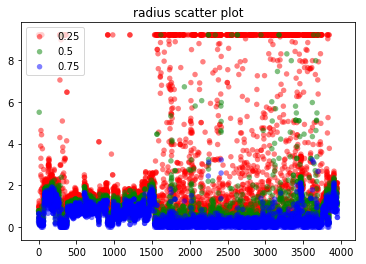

In [21]:
scatterPlot(map(lambda x: I.np.array(x)*0.092, radiiSet))

## scatterPlot post Mes.

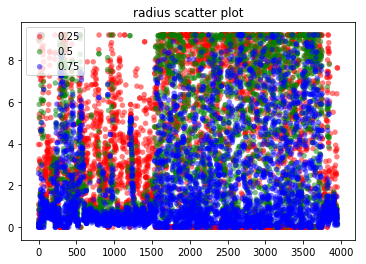

In [22]:
scatterPlot(map(lambda x: I.np.array(x)*0.092, postRadiiSet))

## scatterplot of bright (>100) structure

In [ ]:
pdf = I.pd.DataFrame(radiiSet).T*0.092

In [ ]:
pdf

In [ ]:
pdf['intensity'] = intensity_at_point

In [ ]:
selected_pdf = pdf[pdf.intensity > 40]

In [ ]:
radiiSet_selected = map(lambda columnname: list(selected_pdf[columnname]), [0,1,2])

In [ ]:
scatterPlot(radiiSet_selected)

In [ ]:
scatterPlot(radiiSet_selected, style = 'line') 

In [ ]:
pdf_selected = pdf[pdf.intensity > 120]
I.plt.hist(pdf_selected[0]-pdf_selected[2])

In [ ]:
bins = I.np.arange(0,10,.1)
out = []
for intensity_cutoff in range(0,200,1):
    pdf_selected = pdf[pdf.intensity > intensity_cutoff]
    out.append(I.np.histogram(pdf_selected[0]-pdf_selected[2], bins = bins, normed = True)[0])

In [ ]:
error_pdf = I.pd.DataFrame(out, index = range(0,200,1), columns = bins[:-1])
error_pdf.index.name = 'intensity_cutoff'
error_pdf = error_pdf.T
error_pdf.index.name = 'error / micron'
error_pdf = error_pdf.iloc[::-1]


In [ ]:
I.sns.heatmap(error_pdf, vmax=.1)

In [ ]:
bins = I.np.arange(0,10,.1)
out = {}
for intensity_cutoff in range(0,200,1):
    pdf_selected = pdf[pdf.intensity > intensity_cutoff]
    out[intensity_cutoff] = len(pdf_selected) / float(len(pdf))

In [ ]:
I.pd.Series(out).plot()

In [ ]:
out[50]